In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split

train = pd.read_csv('train.tsv', delimiter = '\t') #tsvの場合は読み込む際にdelimiter = '\t'  Tab Separated Value でTSV
test = pd.read_csv('test.tsv', delimiter = '\t')
submission = pd.read_csv('sample_submit.csv', header = None)

y_train = train['Y']
X_train = train.drop('Y', axis = 1)
X_test = test

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0, stratify = y_train)

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train)

params = {
    'objective' : 'binary'
}
model = lgb.train(params, lgb_train, 
                 valid_sets = [lgb_train, lgb_eval], 
                 verbose_eval = 10,
                 num_boost_round = 1000,
                 early_stopping_rounds = 10)

y_pred = model.predict(X_test, num_iteration = model.best_iteration)
y_pred = (y_pred > 0.5).astype(int)

submission[1] = y_pred
submission = submission.astype(int)
submission.to_csv('submission_1.csv', index = False, header= False)


# feature importanceを表示
importance = pd.DataFrame(model.feature_importance(), index=X_train.columns, columns=['importance'])
display(importance)

import matplotlib.pyplot as plt
ax = lgb.plot_tree(model, tree_index=0, figsize=(20, 20), show_info=['split_gain'])
plt.show()
graph = lgb.create_tree_digraph(model, tree_index=0, format='png', name='Tree')
graph.render(view=True)


ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in the following fields: cap-shape, cap-surface, cap-color, bruises, odor, gill-attachment, gill-spacing, gill-size, gill-color, stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, stalk-color-above-ring, stalk-color-below-ring, veil-type, veil-color, ring-number, ring-type, spore-print-color, population, habitat

In [21]:
#必要ライブラリのインポート
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split

#データの読み込み
train = pd.read_csv('train.tsv', delimiter = '\t') #tsvの場合は読み込む際にdelimiter = '\t'  Tab Separated Value でTSV
test = pd.read_csv('test.tsv', delimiter = '\t')
submission = pd.read_csv('sample_submit.csv', header = None)

In [22]:
#データの整形
y_train = train['Y'].replace({'p':0, 'e':1}) #get_dummiesを用いるとe, pが2カラムとなり目的変数が２種類となってしまうエラーが出てくるので気をつける
X_train = pd.get_dummies(train.drop('Y', axis = 1)) #簡単にカテゴリーを数値データにできるget_dummiesを用いる
X_test = pd.get_dummies(test) 

In [23]:
#LightGBMを用いて分析できるように交差検証の下準備
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0, stratify = y_train)

#LightGBMで分析できるようにデータ型を変更する
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train)

#パラメーターを設定する
params = {
    'objective' : 'binary'
}

#modelの学習を行う
model = lgb.train(params, lgb_train, 
                 valid_sets = [lgb_train, lgb_eval], 
                 verbose_eval = 10,
                 num_boost_round = 1000,
                 early_stopping_rounds = 10)

#学習したモデルで予測を行い、整形する
y_pred = model.predict(X_test, num_iteration = model.best_iteration)
y_pred = (y_pred > 0.5).astype(int)

[LightGBM] [Info] Number of positive: 1472, number of negative: 1371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 2843, number of used features: 97
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.517763 -> initscore=0.071082
[LightGBM] [Info] Start training from score 0.071082
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[220]	training's binary_logloss: 1.21386e-06	valid_1's binary_logloss: 1.84129e-06
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[230]	training's binary_logloss: 1.19228e-06	valid_1's binary_logloss: 1.80547e-06
[LightGBM

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[388]	training's binary_logloss: 1.06163e-06	valid_1's binary_logloss: 1.69366e-06


In [24]:
#予測・整形したデータを提出データに埋め込む
submission[1] = y_pred
# print(submission.head())
submission[1] = submission[1].replace({0:'p', 1:'e'})
# print(submission.head())
submission.to_csv('submission_1.csv', index = False, header= False)

In [25]:
# feature importanceを表示
importance = pd.DataFrame(model.feature_importance(), index=X_train.columns, columns=['importance'])
display(importance)

,importance
id,400
cap-shape_b,80
cap-shape_c,0
cap-shape_f,27
cap-shape_k,4
...,...
habitat_l,0
habitat_m,21
habitat_p,0
habitat_u,20


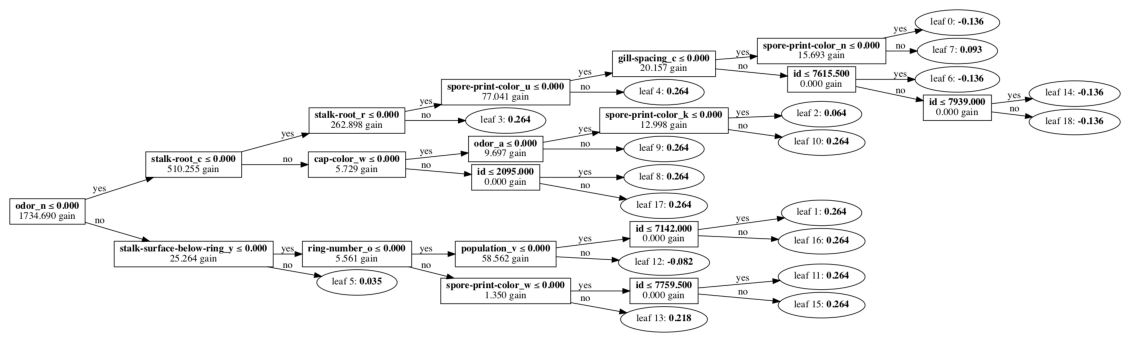

'Tree.gv.png'

In [26]:
#決定木の構造を可視化
import matplotlib.pyplot as plt
ax = lgb.plot_tree(model, tree_index=0, figsize=(20, 20), show_info=['split_gain'])
plt.show()
graph = lgb.create_tree_digraph(model, tree_index=0, format='png', name='Tree')
graph.render(view=True)

[LightGBM] [Info] Number of positive: 1472, number of negative: 1371
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 2843, number of used features: 96
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.517763 -> initscore=0.071082
[LightGBM] [Info] Start training from score 0.071082
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[230]	training's binary_logloss: 1.23975e-06	valid_1's binary_logloss: 1.5465e-06
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

,importance
cap-shape_b,116
cap-shape_c,0
cap-shape_f,60
cap-shape_k,9
cap-shape_s,0
...,...
habitat_l,0
habitat_m,23
habitat_p,0
habitat_u,20


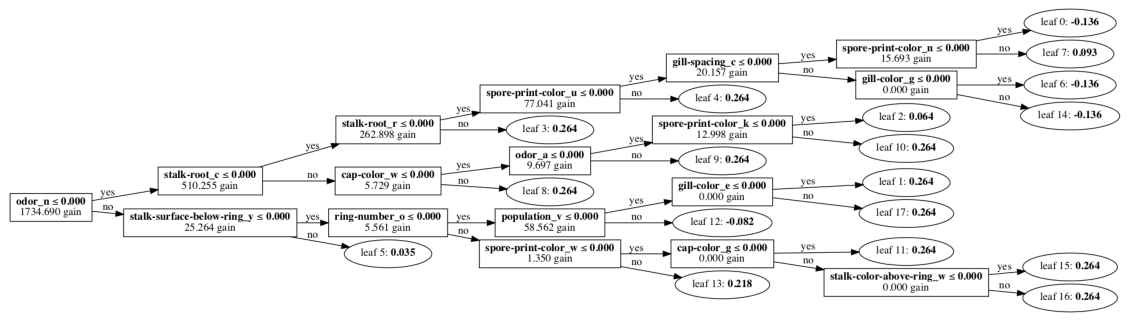

'Tree.gv.png'

In [27]:
#必要ライブラリのインポート
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split

#データの読み込み
train = pd.read_csv('train.tsv', delimiter = '\t') #tsvの場合は読み込む際にdelimiter = '\t'  Tab Separated Value でTSV
test = pd.read_csv('test.tsv', delimiter = '\t')
submission = pd.read_csv('sample_submit.csv', header = None)

data = pd.concat([train, test], sort = False)
data_1 = data.drop(['id'], axis = 1)

train = data_1[:len(train)]
test = data_1[len(train):]

#データの整形
y_train = train['Y'].replace({'p':0, 'e':1}) #get_dummiesを用いるとe, pが2カラムとなり目的変数が２種類となってしまうエラーが出てくるので気をつける(https://qiita.com/katsuki104/items/71c7581cce60f0e303f3)
X_train = pd.get_dummies(train.drop('Y', axis = 1)) #簡単にカテゴリーを数値データにできるget_dummiesを用いる
X_test = pd.get_dummies(test) 

#LightGBMを用いて分析できるように交差検証の下準備
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0, stratify = y_train)

#LightGBMで分析できるようにデータ型を変更する
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train)

#パラメーターを設定する
params = {
    'objective' : 'binary'
}

#modelの学習を行う
model = lgb.train(params, lgb_train, 
                 valid_sets = [lgb_train, lgb_eval], 
                 verbose_eval = 10,
                 num_boost_round = 1000,
                 early_stopping_rounds = 10)

#学習したモデルで予測を行い、整形する
y_pred = model.predict(X_test, num_iteration = model.best_iteration)
y_pred = (y_pred > 0.5).astype(int)

#予測・整形したデータを提出データに埋め込む
submission[1] = y_pred
# print(submission.head())
submission[1] = submission[1].replace({0:'p', 1:'e'})
# print(submission.head())
submission.to_csv('submission_1.csv', index = False, header= False)

# feature importanceを表示
importance = pd.DataFrame(model.feature_importance(), index=X_train.columns, columns=['importance'])
display(importance)

#決定木の構造を可視化
import matplotlib.pyplot as plt
ax = lgb.plot_tree(model, tree_index=0, figsize=(20, 20), show_info=['split_gain'])
plt.show()
graph = lgb.create_tree_digraph(model, tree_index=0, format='png', name='Tree')
graph.render(view=True)

In [28]:
importance.sort_values('importance', ascending=False)

,importance
bruises_f,289
gill-size_b,191
gill-spacing_c,191
odor_a,175
population_c,168
...,...
veil-type_p,0
veil-color_n,0
veil-color_o,0
veil-color_w,0


In [29]:
importance.sort_values('importance', ascending=False).index[0]

'bruises_f'

## 各変数の重要度を横棒グラフで表したい

In [30]:
# 横軸が重要度、縦が変数名なので必要なデータは
df_importance = importance.sort_values('importance', ascending=False)

In [31]:
df_importance_20 = df_importance.head(20)

<BarContainer object of 20 artists>

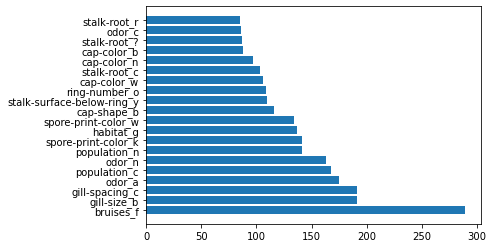

In [32]:
plt.barh(df_importance_20.index, df_importance_20['importance'])

このモデルでは分析の際にbruises_fの値を最重要視している。<br>
bruises : 斑点（斑点あり=t, 斑点なし=f）<br>
確かに斑点があったら危険そうだと感じるし、実際問題危険。

## データ分析の簡単な手順を実行してみる
https://qiita.com/ysdyt/items/9ccca82fc5b504e7913a

In [7]:
import pandas as pd
df = pd.read_csv('train.tsv', delimiter = '\t')

In [8]:
df.head()

,id,Y,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,p,f,y,n,f,f,f,c,n,...,k,w,w,p,w,o,e,w,v,d
1,2,p,f,y,y,f,f,f,c,b,...,k,b,p,p,w,o,l,h,y,g
2,3,e,b,y,w,t,l,f,c,b,...,s,w,w,p,w,o,p,k,n,m
3,5,p,x,s,b,t,f,f,c,b,...,s,w,w,p,w,o,p,h,v,u
4,7,p,x,s,w,t,f,f,c,b,...,f,w,w,p,w,o,p,h,v,g


各列の情報について
https://signate.jp/competitions/105/data

In [9]:
df.tail()

,id,Y,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4057,8110,p,f,y,n,f,s,f,c,n,...,k,p,p,p,w,o,e,w,v,p
4058,8113,p,x,f,y,f,f,f,c,b,...,k,b,b,p,w,o,l,h,v,p
4059,8117,p,k,y,n,f,y,f,c,n,...,s,w,p,p,w,o,e,w,v,d
4060,8118,p,x,s,n,t,p,f,c,n,...,s,w,w,p,w,o,p,k,v,u
4061,8121,p,f,s,n,f,f,f,c,n,...,s,p,w,p,w,o,e,w,v,p


In [10]:
print('dataframeの行数・列数の確認==>\n', df.shape)
print('indexの確認==>\n', df.index)
print('columnの確認==>\n', df.columns)
print('dataframeの各列のデータ型を確認==>\n', df.dtypes)

dataframeの行数・列数の確認==>
 (4062, 24)
indexの確認==>
 RangeIndex(start=0, stop=4062, step=1)
columnの確認==>
 Index(['id', 'Y', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')
dataframeの各列のデータ型を確認==>
 id                           int64
Y                           object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root         

In [11]:
# 任意の列だけ取り出したい場合
df[['Y', 'bruises']].head()

,Y,bruises
0,p,f
1,p,f
2,e,t
3,p,t
4,p,t


In [12]:
# 100行目から105行目まで表示したい場合
df[100:106]

,id,Y,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
100,186,e,x,y,e,t,n,f,c,b,...,s,g,w,p,w,o,p,k,y,d
101,193,p,x,s,e,f,s,f,c,n,...,k,w,p,p,w,o,e,w,v,l
102,197,p,x,y,y,f,f,f,c,b,...,k,n,p,p,w,o,l,h,y,g
103,198,p,x,y,n,f,s,f,c,n,...,k,w,w,p,w,o,e,w,v,p
104,199,p,x,f,y,f,f,f,c,b,...,k,b,p,p,w,o,l,h,y,p
105,201,e,b,s,y,t,l,f,c,b,...,s,w,w,p,w,o,p,k,n,g


In [13]:
# indexが100の行だけ取得したい場合
df.loc[100]

id                          186
Y                             e
cap-shape                     x
cap-surface                   y
cap-color                     e
bruises                       t
odor                          n
gill-attachment               f
gill-spacing                  c
gill-size                     b
gill-color                    p
stalk-shape                   t
stalk-root                    b
stalk-surface-above-ring      s
stalk-surface-below-ring      s
stalk-color-above-ring        g
stalk-color-below-ring        w
veil-type                     p
veil-color                    w
ring-number                   o
ring-type                     p
spore-print-color             k
population                    y
habitat                       d
Name: 100, dtype: object

In [14]:
# もっとピンポイントに抽出したい場合
# 例: 1,2,4 行目と 0-2 列目を取得
df.iloc[[1,2,4],[0,2]]

,id,cap-shape
1,2,f
2,3,b
4,7,x


In [15]:
# 条件を指定して抽出
df[df['Y'] == 'e']

,id,Y,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2,3,e,b,y,w,t,l,f,c,b,...,s,w,w,p,w,o,p,k,n,m
5,10,e,f,s,n,f,n,a,c,b,...,s,o,o,p,o,o,p,o,c,l
8,16,e,x,y,y,t,l,f,c,b,...,s,w,w,p,w,o,p,n,s,g
10,21,e,x,f,n,t,n,f,c,b,...,s,p,p,p,w,o,p,n,v,d
11,24,e,f,y,n,t,a,f,c,b,...,y,w,w,p,w,o,p,k,s,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4047,8090,e,x,y,g,t,n,f,c,b,...,s,p,w,p,w,o,p,n,v,d
4052,8098,e,b,s,w,t,l,f,c,b,...,s,w,w,p,w,o,p,k,n,m
4054,8105,e,f,f,g,t,n,f,c,b,...,s,g,p,p,w,o,p,k,y,d
4055,8106,e,b,s,n,f,n,a,c,b,...,s,o,o,p,o,o,p,o,v,l


In [16]:
# queryメソッドを使うと、複数条件の指定で、特定カラムだけ出力もできる
df[['Y', 'population']].query('Y == "e" and population == "v"') #query内のシングル/ダブルクオーテーションの使い方に注意

,Y,population
10,e,v
20,e,v
23,e,v
24,e,v
30,e,v
...,...,...
4036,e,v
4039,e,v
4044,e,v
4047,e,v


In [17]:
# 'population'には例えばどんなデータが入っているか確認
df['population'].unique()

array(['v', 'y', 'n', 'c', 's', 'a'], dtype=object)

In [18]:
# 要約統計量の表示
df.describe()

,id
count,4062.000000
mean,4065.003939
std,2352.576107
min,0.000000
25%,2034.250000
50%,4047.500000
75%,6106.500000
max,8121.000000


In [19]:
# カラム名を変更する（y を sales に変換）
df.rename(columns={'Y': 'poison'}, inplace=True)
df.head()

,id,poison,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,p,f,y,n,f,f,f,c,n,...,k,w,w,p,w,o,e,w,v,d
1,2,p,f,y,y,f,f,f,c,b,...,k,b,p,p,w,o,l,h,y,g
2,3,e,b,y,w,t,l,f,c,b,...,s,w,w,p,w,o,p,k,n,m
3,5,p,x,s,b,t,f,f,c,b,...,s,w,w,p,w,o,p,h,v,u
4,7,p,x,s,w,t,f,f,c,b,...,f,w,w,p,w,o,p,h,v,g


In [20]:
# 列単位で 欠損値NaN(not a number)が入っている個数をカウントする （正確には、isnull()でtrueが返ってくる個数をカウントしている）
df.isnull().sum()

id                          0
poison                      0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [39]:
#必要ライブラリのインポート
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn import tree

#データの読み込み
train = pd.read_csv('train.tsv', delimiter = '\t') #tsvの場合は読み込む際にdelimiter = '\t'  Tab Separated Value でTSV
test = pd.read_csv('test.tsv', delimiter = '\t')
submission = pd.read_csv('sample_submit.csv', header = None)

data = pd.concat([train, test], sort = False)
data_1 = data.drop(['id'], axis = 1)

train = data_1[:len(train)]
test = data_1[len(train):]

#データの整形
y_train = train['Y'].replace({'p':0, 'e':1}) #get_dummiesを用いるとe, pが2カラムとなり目的変数が２種類となってしまうエラーが出てくるので気をつける(https://qiita.com/katsuki104/items/71c7581cce60f0e303f3)
X_train = pd.get_dummies(train.drop('Y', axis = 1)) #簡単にカテゴリーを数値データにできるget_dummiesを用いる
X_test = pd.get_dummies(test) 


model = tree.DecisionTreeClassifier()
# 決定木モデルの作成
model.fit(X_train, y_train)
# 作成した決定木モデルを使った予測をおこなう
y_pred = model.predict(X_test)
# 予測結果の確認
print(y_pred)



#予測・整形したデータを提出データに埋め込む
submission[1] = y_pred
# print(submission.head())
submission[1] = submission[1].replace({0:'p', 1:'e'})
# print(submission.head())
submission.to_csv('submission_tree.csv', index = False, header= False)

# feature importanceを表示
importance = pd.DataFrame(model.feature_importance(), index=X_train.columns, columns=['importance'])
display(importance)

#決定木の構造を可視化
import matplotlib.pyplot as plt
ax = lgb.plot_tree(model, tree_index=0, figsize=(20, 20), show_info=['split_gain'])
plt.show()
graph = lgb.create_tree_digraph(model, tree_index=0, format='png', name='Tree')
graph.render(view=True)

[0 1 1 ... 1 0 1]


AttributeError: 'DecisionTreeClassifier' object has no attribute 'feature_importance'